In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# CONFIDENCE INTERVALS

### EXERCISE 1

What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

In [2]:
n = 130
xbar = 98.25
std = 0.73

sem = std / np.sqrt(n)

In [3]:
stats.norm.interval(alpha=0.99, loc=xbar, scale=sem)

(98.08508192246582, 98.41491807753418)

In [4]:
stats.t.interval(alpha=0.99, df=n-1, loc=xbar, scale=sem)

(98.08260738705933, 98.41739261294067)

### EXERCISE 2

The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [5]:
stats.norm.interval(alpha=0.95,
                    loc=5.4,
                    scale= 3.1 / np.sqrt(500))

(5.12827801242126, 5.67172198757874)

In [6]:
stats.t.interval(alpha=0.95,
                 df=500-1,
                 loc=5.4,
                 scale= 3.1 / np.sqrt(500))

(5.127617354510309, 5.672382645489692)

# HYPOTHESIS TESTING

### EXERCISE 3

The hourly wages in a particular industry are normally distributed with mean $13.20  and standard deviation  $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [7]:
mu = 13.20

xbar = 12.20
n = 40

sigma = 2.50

alpha = 0.01

In [8]:
z = (xbar - mu) / (sigma/np.sqrt(n))
z

-2.5298221281347035

In [9]:
pvalue = stats.norm.cdf(z)
pvalue

0.005706018193000826

In [12]:
# Decision
if pvalue < alpha:
    print("Reject the null. At the α=0.01, we have sufficient evidence to indicate that this company can be accused of paying substandard wages")
else:
    print("Fail to reject the null.")

Reject the null. At the α=0.01, we have sufficient evidence to indicate that this company can be accused of paying substandard wages


### EXERCISE 4

Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [13]:
soil = pd.read_csv("soil.csv")

In [14]:
soil

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [15]:
leveneTest = stats.levene(soil.Soil1.dropna(), soil.Soil2,)
leveneTest

# Since the pvalue is larger than 0.05, "equal_var" should be True

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [16]:
ttest = stats.ttest_ind(soil.Soil1, soil.Soil2, equal_var=True, nan_policy="omit")
ttest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [17]:
# Decision
alpha = 0.01

if ttest.pvalue < alpha:
    print("Reject the null. At the α=0.01, we have sufficient evidence to indicate that the soils appear to differ with respect to average shear strength. ")
else:
    print("Fail to reject the null.")

Reject the null. At the α=0.01, we have sufficient evidence to indicate that the soils appear to differ with respect to average shear strength. 


### EXERCISE 5

The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

- Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
- Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [18]:
pisa = pd.read_csv("2015 PISA Test.csv")

In [19]:
pisa

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [20]:
pisa_EU_AS = pisa[(pisa.Continent_Code == "EU")|(pisa.Continent_Code == "AS")]

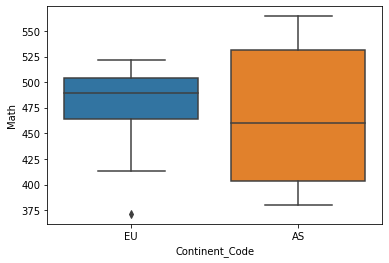

In [21]:
sns.boxplot(data=pisa_EU_AS, x="Continent_Code", y="Math");

In [22]:
EU_mean = pisa[pisa.Continent_Code == "EU"].Math.mean()
EU_mean

477.98144864864867

In [23]:
AS_mean = pisa[pisa.Continent_Code == "AS"].Math.mean()
AS_mean

466.2166470588236

In [24]:
leveneTest = stats.levene(pisa[pisa.Continent_Code == "EU"].Math, pisa[pisa.Continent_Code == "AS"].Math)
leveneTest

LeveneResult(statistic=14.300030628780675, pvalue=0.0004037413184451079)

In [25]:
indTest = stats.ttest_ind(pisa[pisa.Continent_Code == "EU"].Math, pisa[pisa.Continent_Code == "AS"].Math, equal_var = True)
indTest

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [26]:
indTest.pvalue

0.38826888111307345

In [27]:
# Decision
alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the null. At the α=0.05, we have sufficient evidence to indicate that the math scores differ for European and Asian countries. ")
else:
    print("Fail to reject the null.")

Fail to reject the null.
